In [1]:
import pandas as pd
import datetime
import numpy as np

pd.set_option('display.max_column', None,'display.max_row', 30)

game_data = pd.read_csv('cleaned_game_data.csv', index_col = 0)

#Converting release_date to datetime
game_data['release_date'] = pd.to_datetime(game_data['release_date'])
game_data

,app_id,type,name,release_date,free_to_play,developer_1,developer_2,developer_3,publisher_1,publisher_2,publisher_3,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,genre_Early Access,genre_Education,genre_Free to Play,genre_Gore,genre_Indie,genre_Massively Multiplayer,genre_Nudity,genre_Photo Editing,genre_RPG,genre_Racing,genre_Sexual Content,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Utilities,genre_Video Production,genre_Violent,genre_Web Publishing,meanPlayers2017,meanPlayers2018,meanPlayers2019,meanPlayers2020,first_available_price,last_available_price,lowest_price,highest_price
0,578080,game,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,0.0,PUBG Corporation,0,0,PUBG Corporation,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1443309,841204,366385,238828,29.99,29.99,14.99,29.99
1,570,game,Dota 2,2013-07-09,1.0,Valve,0,0,Valve,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,528727,450816,475222,442868,0.00,0.00,0.00,0.00
2,730,game,Counter-Strike: Global Offensive,2012-08-21,1.0,Valve,Hidden Path Entertainment,0,Valve,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347535,317709,396300,660862,0.00,0.00,0.00,0.00
3,622590,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS (Test Server),NaT,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2811,580,587,0.00,0.00,0.00,0.00
4,359550,game,Tom Clancy's Rainbow Six Siege,2015-12-01,0.0,Ubisoft Montreal,0,0,Ubisoft,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60281,67572,71262,90971,19.99,19.99,7.99,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,34000,advertising,Football Manager 2010,2009-10-29,1.0,Sports Interactive,0,0,SEGA,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,88,70,89,0.00,0.00,0.00,0.00
1996,202480,NaN,Skyrim Creation Kit,NaT,NaN,NaN,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,138,101,91,0.00,0.00,0.00,0.00
1997,429050,game,Feed and Grow: Fish,2016-01-08,0.0,Old B1ood,0,0,Greens s.r.o.,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225,280,258,304,14.99,14.99,8.99,14.99
1998,209650,game,Call of Duty: Advanced Warfare,2014-11-03,0.0,Sledgehammer Games,Raven Software,0,Activision,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111,87,72,66,59.99,59.99,14.99,59.99


In [2]:
#Getting player count data only

player_data = game_data.loc[game_data['release_date'] < datetime.datetime(2018,1,1)]
player_data.index = player_data['name']
player_data = player_data[['meanPlayers2017', 'meanPlayers2018','meanPlayers2019','meanPlayers2020']]

player_data = player_data.dropna()
player_data

,meanPlayers2017,meanPlayers2018,meanPlayers2019,meanPlayers2020
name,,,,
PLAYERUNKNOWN'S BATTLEGROUNDS,1443309,841204,366385,238828
Dota 2,528727,450816,475222,442868
Counter-Strike: Global Offensive,347535,317709,396300,660862
Tom Clancy's Rainbow Six Siege,60281,67572,71262,90971
Grand Theft Auto V,96765,53811,68357,115017
...,...,...,...,...
Castle Story,250,80,70,84
Football Manager 2010,102,88,70,89
Feed and Grow: Fish,225,280,258,304


C:\Users\jonho\AppData\Local\Temp/ipykernel_3612/1646733285.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(figsize=(8,5)).gca(projection='3d')


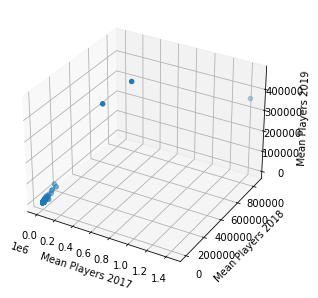

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,5)).gca(projection='3d')
fig.scatter(player_data['meanPlayers2017'],player_data['meanPlayers2018'],player_data['meanPlayers2019'])
fig.set_xlabel('Mean Players 2017')
fig.set_ylabel('Mean Players 2018')
fig.set_zlabel('Mean Players 2019')
plt.show()

In [4]:
meanValue = player_data.mean()
covValue = player_data.cov()
print(meanValue)
print(covValue)

meanPlayers2017    2235.908888
meanPlayers2018    1656.940190
meanPlayers2019    1402.830073
meanPlayers2020    1714.011179
dtype: float64
                 meanPlayers2017  meanPlayers2018  meanPlayers2019  \
meanPlayers2017     1.404466e+09     8.865009e+08     5.263012e+08   
meanPlayers2018     8.865009e+08     5.766974e+08     3.737528e+08   
meanPlayers2019     5.263012e+08     3.737528e+08     3.013657e+08   
meanPlayers2020     4.711680e+08     3.571094e+08     3.304329e+08   

                 meanPlayers2020  
meanPlayers2017     4.711680e+08  
meanPlayers2018     3.571094e+08  
meanPlayers2019     3.304329e+08  
meanPlayers2020     4.118141e+08  


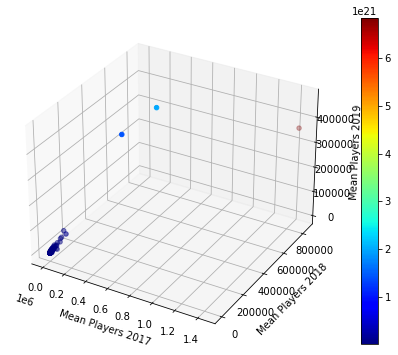

In [5]:
from numpy.linalg import inv

player_data_modified = player_data.copy(deep = True)

X = player_data.values
S = covValue.values
for i in range(3):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(player_data_modified['meanPlayers2017'],player_data_modified['meanPlayers2018'],player_data_modified['meanPlayers2019'],c=anomaly_score,cmap='jet')
ax.set_xlabel('Mean Players 2017')
ax.set_ylabel('Mean Players 2018')
ax.set_zlabel('Mean Players 2019')
fig.colorbar(p)
plt.show()

In [6]:
anom = pd.DataFrame(anomaly_score, index=player_data.index, columns=['Anomaly score'])
result = pd.concat((player_data,anom), axis=1)
result.nlargest(20,'Anomaly score')

,meanPlayers2017,meanPlayers2018,meanPlayers2019,meanPlayers2020,Anomaly score
name,,,,,
PLAYERUNKNOWN'S BATTLEGROUNDS,1441073,839547,364982,238828,6.839638e+21
Dota 2,526491,449159,473819,442868,1.995492e+21
Counter-Strike: Global Offensive,345299,316052,394897,660862,1.418911e+21
Grand Theft Auto V,94529,52154,66954,115017,5.854969e+19
Tom Clancy's Rainbow Six Siege,58045,65915,69859,90971,4.006884e+19
Team Fortress 2,51339,42435,46313,64964,2.205913e+19
Warframe,51015,52510,47742,46090,2.139257e+19
ARK: Survival Evolved,53307,36867,35298,62857,1.949404e+19
Rocket League,34529,30780,31916,44540,1.049130e+19


Price Data for non-free to play games

In [7]:
price_data = game_data.loc[game_data['free_to_play'] == 0]
price_data.index = price_data['name']
price_data = price_data[['lowest_price','highest_price']]
price_data.sort_values(['lowest_price'],ascending = True)

,lowest_price,highest_price
name,,
Assassin's Creed® III,0.00,0.00
Stronghold 3,0.00,0.00
Dead Bits,0.49,0.99
"GO AWAY, THERE'S KUMIS OVER THERE!",0.49,0.99
Project Tarvotan,0.49,1.99
...,...,...
WWE 2K17,49.99,49.99
WWE 2K18,59.99,59.99
NBA 2K17,59.99,59.99


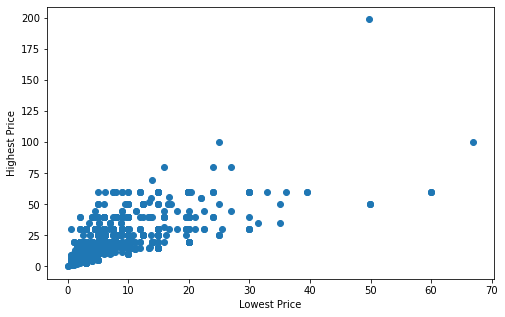

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,5)).gca()
fig.scatter(price_data['lowest_price'],price_data['highest_price'])
fig.set_xlabel('Lowest Price')
fig.set_ylabel('Highest Price')
plt.show()

In [9]:
meanValue = price_data.mean()
covValue = price_data.cov()
print(meanValue)
print(covValue)

lowest_price      6.153099
highest_price    18.947910
dtype: float64
               lowest_price  highest_price
lowest_price      46.299993      72.807051
highest_price     72.807051     223.818553


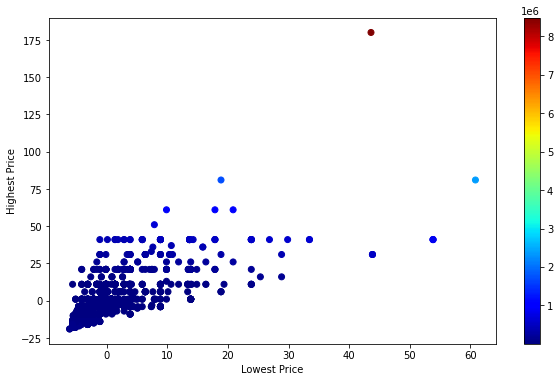

In [10]:
from numpy.linalg import inv

price_data_modified = price_data.copy(deep = True)

X = price_data_modified.values
S = covValue.values
for i in range(2):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
p = ax.scatter(price_data_modified['lowest_price'],price_data_modified['highest_price'],c=anomaly_score,cmap='jet')
ax.set_xlabel('Lowest Price')
ax.set_ylabel('Highest Price')
fig.colorbar(p)
plt.show()

In [11]:
anom = pd.DataFrame(anomaly_score, index=price_data.index, columns=['Anomaly score'])
result = pd.concat((price_data,anom), axis=1)
result.nlargest(20,'Anomaly score')

,lowest_price,highest_price,Anomaly score
name,,,
VEGAS Pro 14 Edit Steam Edition,49.75,199.00,8.486950e+06
GameMaker Studio 2 Desktop,66.99,99.99,2.359291e+06
Clickteam Fusion 2.5,24.99,99.99,1.708720e+06
Command: Modern Air / Naval Operations WOTY,26.99,79.99,1.039292e+06
Gary Grigsby's War in the East,23.99,79.99,1.007254e+06
RPG Maker MV,15.99,79.99,9.258949e+05
NBA 2K18,59.99,59.99,8.329542e+05
NBA 2K17,59.99,59.99,8.329542e+05
WWE 2K18,59.99,59.99,8.329542e+05


In [12]:
price_data.sort_values(['lowest_price'],ascending = True)

,lowest_price,highest_price
name,,
Assassin's Creed® III,0.00,0.00
Stronghold 3,0.00,0.00
Dead Bits,0.49,0.99
"GO AWAY, THERE'S KUMIS OVER THERE!",0.49,0.99
Project Tarvotan,0.49,1.99
...,...,...
WWE 2K17,49.99,49.99
WWE 2K18,59.99,59.99
NBA 2K17,59.99,59.99
